In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test3 import Test
from bitalg.visualizer.main import Visualizer

# Triangulacja wielokątów monotonicznych - problem monitorowania galerii


## Przydatne funkcje


In [3]:
polygon_example_1 = [(5,5), (3,4), (6,3), (4,2), (6,0), (7,1), (8,4)]
polygon_example_2 = [(4, 1), (2, 2), (3, 5), (4, 7), (6, 6), (3, 9), (6, 8), (9, 10), (7, 4), (4, 3), (5, 0)]
polygon_example_colors = [4,4,4,4,3,0,2,0,4,4,1]
polygon_example_tri = [(polygon_example_1[0], polygon_example_1[2]),
                      (polygon_example_1[2], polygon_example_1[5]),
                      (polygon_example_1[2], polygon_example_1[6]),
                      (polygon_example_1[6], polygon_example_1[3]),
                      (polygon_example_1[2], polygon_example_1[4]),]
       

In [4]:
def draw_polygon(polygon):
    vis = Visualizer()
    points = polygon
    vis.add_polygon(polygon, fill=False)
    vis.show()


In [5]:
def draw_polygon_colors(polygon,colors):
    points_start=[]
    points_end=[]
    points_connect=[]
    points_divide=[]
    points_regular=[]
    for i in range(len(polygon)):
        if colors[i]==0:
            points_start.append(polygon[i])
        elif colors[i]==1:
            points_end.append(polygon[i])
        elif colors[i]==2:
            points_connect.append(polygon[i])
        elif colors[i]==3:
            points_divide.append(polygon[i])
        elif colors[i]==4:
            points_regular.append(polygon[i])

    vis = Visualizer()
    colors_start = ['green']
    color_end=['red']
    color_connect=['blue']
    color_divide=['cyan']
    color_regular=['#3B240B']
    vis.add_polygon(polygon, fill=False)
    vis.add_point(points_start, color=colors_start)
    vis.add_point(points_end, color=color_end)
    vis.add_point(points_connect, color=color_connect)
    vis.add_point(points_divide, color=color_divide)
    vis.add_point(points_regular, color=color_regular)
    vis.show()


In [6]:
def draw_polygon_tri(polygon,tri):

    vis = Visualizer()
    points = polygon
    tri_line_segments = tri
    vis.add_polygon(points, fill=False)
    vis.add_point(points)
    vis.add_line_segment(tri_line_segments, color='red')
    vis.show()


## Wprowadzenie
Celem ćwiczenia jest:
- sprawdzanie $y$-monotoniczności
- podział wierchołków na kategorie
- triangulacja wielokąta monotonicznego

### Przykładowy wielokąt $y$-monotoniczny

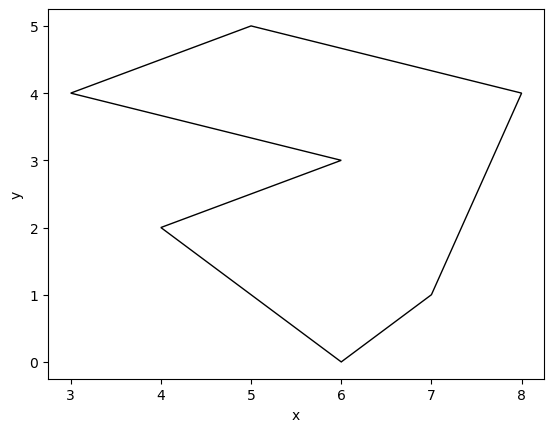

In [7]:
draw_polygon(polygon_example_1)

Do tego celu wygeneruj wielokąt.

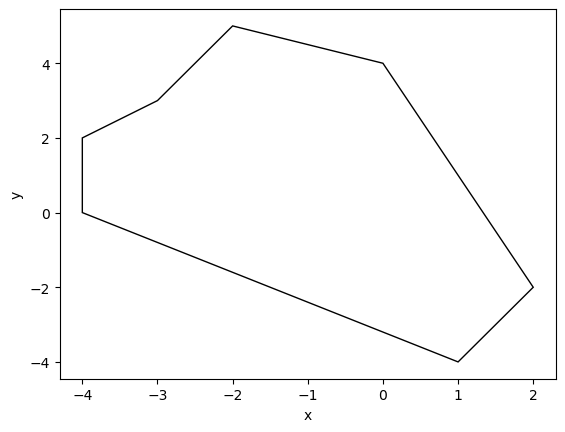

In [8]:
polygon = [(0,4), (2,-2), (1,-4), (-4,0), (-4, 2), (-3,3), (-2,5)]
draw_polygon(polygon)

## Czy wielokąt jest $y$-monotoniczny?

Wielokąt jest monotoniczny, gdy jego wierzchołki mogą być ułożone w taki sposób, że jedna z jego współrzędnych (na przykład współrzędna $x$ lub $y$, w zależności od układu współrzędnych) zawsze rośnie lub maleje wzdłuż kolejnych wierzchołków. Innymi słowy, dla każdej pary wierzchołków wielokąta (oprócz wierzchołka startowego i końcowego), jeden z punktów ma większą (lub mniejszą) wartość danej współrzędnej niż drugi punkt.

W praktyce, wielokąt monotoniczny może być łatwiej sortowany lub przetwarzany w pewnych algorytmach geometrycznych, ponieważ istnieje pewna kolejność, w jakiej wierzchołki pojawiają się wzdłuż danej osi (np. osi $x$ lub $y$). Monotoniczność może ułatwić znajdowanie przecięć linii w takim wielokącie lub wykonywanie innych operacji geometrycznych. W tym zadaniu interesuje nas monotoniczność wielokąta wzdłuż osi $y$.

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```is_y_monotonic```. Pamiętaj, aby sprawozdanie zawierało krótki opis działania tej funkcji.


In [9]:
def det(a, b, c):
    return (a[0] - c[0])*(b[1] - c[1]) - (a[1] - c[1])*(b[0] - c[0])

In [10]:
def is_y_monotonic(polygon):
    """
    Funkcja określa czy podana figura jest y-monotoniczna.
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: wartość bool - true, jeśli wielokąt jest monotoniczny i false jeśli nie jest
    """
    def index_of_extreme_y(points, mode):
        comparator = max if mode == "max" else min
        return comparator(range(len(points)), key=lambda i: points[i][1])

    n = len(polygon)
    max_y_index = index_of_extreme_y(polygon, "max")
    min_y_index = index_of_extreme_y(polygon, "min")

    def check_branch(start, step):
        previous_index = start
        while previous_index != min_y_index:
            current_index = (previous_index + step) % n
            if polygon[previous_index][1] <= polygon[current_index][1]:
                return False
            previous_index = current_index
        return True

    # check left and right branches
    return check_branch(max_y_index, 1) and check_branch(max_y_index, -1)

Przeprowadź test poprawności powyższej funkcji.

In [11]:
Test().runtest(1, is_y_monotonic)

Lab 3, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.005s


Sprawdź monotoniczność swojego wielokątu.

In [12]:
print(is_y_monotonic(polygon))

True


***

# Podział wierzchołków na kategorie

Wierzchołki naszego wielokąta możemy podzielić na parę kategorii:
- początkowe, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których wielokąt zaczyna się monotoniczny spadek 
- końcowe, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnętrzny ma mniej niż 180 stopni. To wierzchołki, w których monotoniczność wielokąta się zmienia, czyli na przykład zaczyna się monotoniczny wzrost, jeśli wcześniej był spadek, lub na odwrót.

Wierzchołki startowe i końcowe są ważne w kontekście algorytmów przetwarzania wielokątów monotonicznych, takich jak algorytmy dziel i zwyciężaj oraz triangulacji. 
- dzielący, gdy obaj jego sąsiedzi leżą poniżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które wyznaczają przekątne (linie łączące), tworzące trójkąty podczas triangulacji.
- łączący, gdy obaj jego sąsiedzi leżą powyżej i kąt wewnęntrzny ma więcej niż 180 stopni. To wierzchołki, które są połączone liniami (przekątnymi) wewnątrz wielokąta, tworząc trójkąty.

Wierzchołki łączące i dzielące odgrywają kluczową rolę w procesie triangulacji wielokątów, pozwalając na podział figury na trójkąty w sposób bezkolizyjny. 
- prawdiłowy, pozostałe przypadki, jeden sąsiad powyżej drugi poniżej


### Przykładowy wielokąt z pokolorowanymi wierzchołkami.

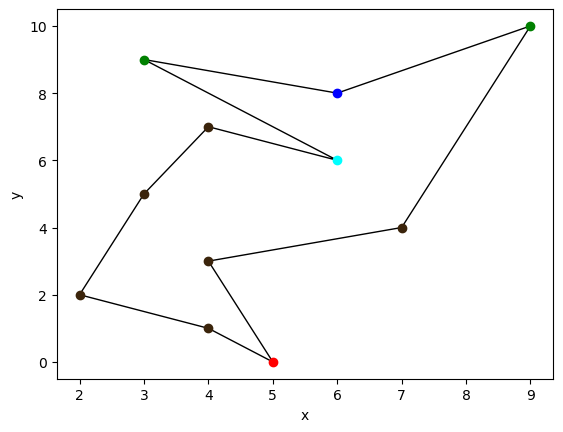

In [13]:
draw_polygon_colors(polygon_example_2,polygon_example_colors)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```color_vertex``` .

In [14]:
def color_vertex(polygon):
    """
    Funkcja dzieli wierzchołki na kategorie i przypisuje wierzchołkom odpowiednie numery: 0 - początkowy, 1 - końcowy, 2 - łączący, 3 - dzielący, 4 - prawdiłowy
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica o długości n, gdzie n = len(polygon), zawierająca cyfry z przedziału 0 - 4, gdzie T[i] odpowiada kategorii i-tego wierzchołka.
    """
    def classify(a, b, c, eps=1e-12):
        if a[1] > b[1] and c[1] > b[1]:
            if det(a, b, c) > eps:
                return 1
            else:
                return 2
        elif a[1] < b[1] and c[1] < b[1]:
            if det(a, b, c) > eps:
                return 0
            else:
                return 3
        return 4


    points_classification = []
    for i in range(0, len(polygon)-1):
        points_classification.append(classify(polygon[i-1], polygon[i], polygon[i+1]))
    points_classification.append(classify(polygon[-2], polygon[-1], polygon[0]))
    return points_classification

Przeprowadź test poprawności powyższej funkcji. 

In [15]:
Test().runtest(2, color_vertex)

Lab 3, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.005s


Zwizualizuj swój wielokąt z pokolorowanymi według kategorii wierzchołkami.

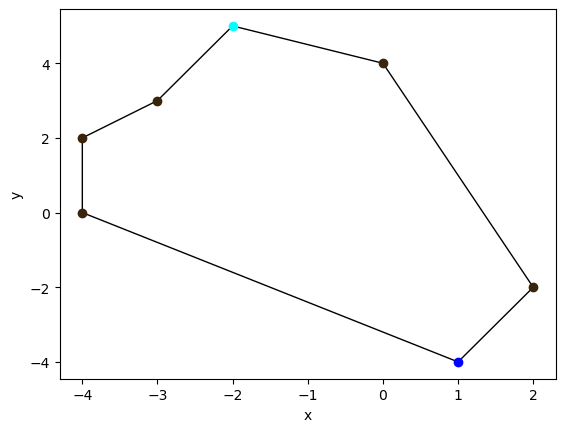

In [16]:
colors = color_vertex(polygon)
draw_polygon_colors(polygon,colors)

***

In [26]:
color_polygon = [
    (-1.5, 2),
    (-1, 0),
    (-0.5, 1),
    (0, -2),
    (0.5, 1),
    (1, 0),
    (1.5, 2),
    (1, 2.5),
    (0.5, 1.5),
    (0, 2.5),
    (-0.5, 1.5),
    (-1, 2.5),
    (-1.5, 2)
]
colors = color_vertex(color_polygon)
draw_polygon_colors(color_polygon,colors)

<IPython.core.display.Javascript object>

# Triangulacja wielokąta monotonicznego

Triangulacja wielokąta monotonicznego to proces podziału wielokąta monotonicznego na trójkąty poprzez dodawanie przekątnych (linii łączących wierzchołki), które nie przecinają się wewnętrznie.

### Przykładowy wielokąt podzielony na trójkąty.

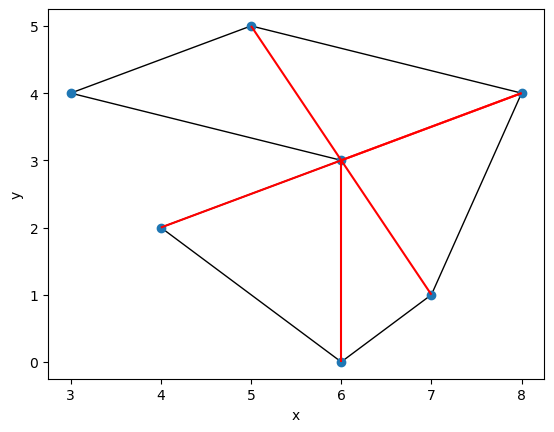

In [18]:
draw_polygon_tri(polygon_example_1,polygon_example_tri)

<span style="color:red">Ćw.</span> Uzupełnij funkcję ```triangulation```. Wykorzystaj algorytm opisany na wykładzie.

In [19]:
def left_right_chains(points):
    right = set()
    left = set()
    start = points.index(max(points, key=lambda x: x[1]))
    end = points.index(min(points, key=lambda x: x[1]))
    i = end
    while i != start:
        right.add(points[i])
        i = (i + 1) % len(points)
    while i != end:
        left.add(points[i])
        i = (i + 1) % len(points)
    return left, right


def same_chain(left, right, point1, point2):
    return (point1 in left and point2 in left) or (point1 in right and point2 in right)

def inside_polygon(chain, a, b, c):
    if b in chain:
        return det(a, b, c) > 0
    return det(a, b, c) < 0


def neighbouring(points, a, b):
    a_index = points.index(a)
    b_index = points.index(b)
    if abs(a_index - b_index) == 1:
        return True
    elif abs(a_index - b_index) == len(points) - 1:
        return True
    return False

def triangulation(polygon, drawable=False):
    """
    Funkcja dokonuje triangulacji wielokąta monotonicznego. 
    :param polygon: tablica krotek punktów na płaszczyźnie euklidesowej podanych przeciwnie do ruchu wskazówek zegara - nasz wielokąt
    :return: tablica krotek dodawanych po kolei przekątnych np: [(1,5),(2,3)], oznacza, że triangulacja polega na dodaniu przekątnej pomiędzy wierzchołki 1-5 i 2-3
    """
    vis = Visualizer()

    if not is_y_monotonic(polygon):
        return []

    points = polygon.copy()
    lines = [(points[i], points[i+1]) for i in range(len(points)-1)] + [(points[-1], points[0])]

    vis.add_point(points, color='red')
    vis.add_line_segment(lines, color='red')

    left, right = left_right_chains(points)
    points.sort(key=lambda x: x[1], reverse=True)

    stack = [points[0], points[1]]
    vis.add_point(stack, color='blue')
    diagonals = []
    for i in range(2, len(points)):
        if not same_chain(left, right, stack[-1], points[i]):
            while len(stack) > 0:
                p = stack.pop()
                if not neighbouring(polygon, p, points[i]):
                    diagonals.append((points[i], p))
                    vis.add_line_segment((points[i], p), color='green')
            stack.append(points[i - 1])
            stack.append(points[i])
            vis.add_point(stack[-1], color='blue')
            vis.add_point(stack[-2], color='blue')
        else:
            p = stack.pop()
            while len(stack) > 0 and inside_polygon(left, stack[-1], p, points[i]):
                if not neighbouring(polygon, p, points[i]) and (points[i], p) not in diagonals:
                    diagonals.append((points[i], p))
                    vis.add_line_segment((points[i], p), color='green')
                if not neighbouring(polygon, stack[-1], points[i]) and (points[i], stack[-1]) not in diagonals:
                    diagonals.append((points[i], stack[-1]))
                    vis.add_line_segment((points[i], stack[-1]), color='green')
                p = stack.pop()
            stack.append(p)
            stack.append(points[i])
            vis.add_point(stack[-1], color='blue')
            vis.add_point(stack[-2], color='blue')

    if drawable:
        # return points for easier drawing
        return diagonals, vis
    else:
        # returning indices of points instead of points themselves
        return [[polygon.index(x[0]), polygon.index(x[1])] for x in diagonals]


Jakich struktur można użyć do przechowywania wielokątu, oraz utworzonej triangulacji? Uzasadnij wybór struktury w swoim algorytmie

ODPOWIEDŹ: 

Przeprowadź testy poprawności powyższej funkcji.


In [20]:
Test().runtest(3, triangulation)

Lab 3, task 3:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
	Test 5: Passed
	Test 6: Passed
	Test 7: Passed
	Test 8: Passed
	Test 9: Passed
	Test 10: Passed
Result: 10/10
Time: 0.006s


Zwizualizuj powstały wielokąt podzielony na trójkąty.

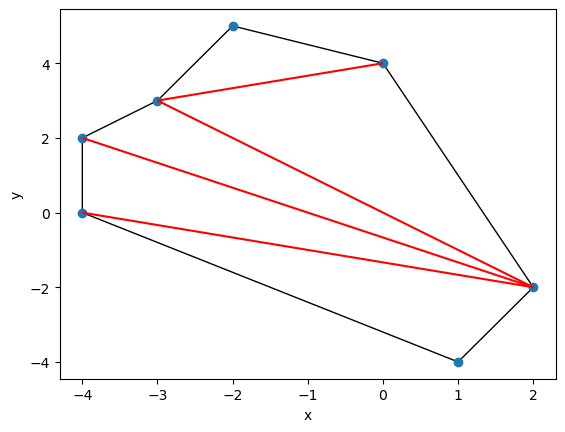

In [21]:
tri, visa = triangulation(polygon, True)
draw_polygon_tri(polygon,tri)
visa.save_gif('triangulation.gif')

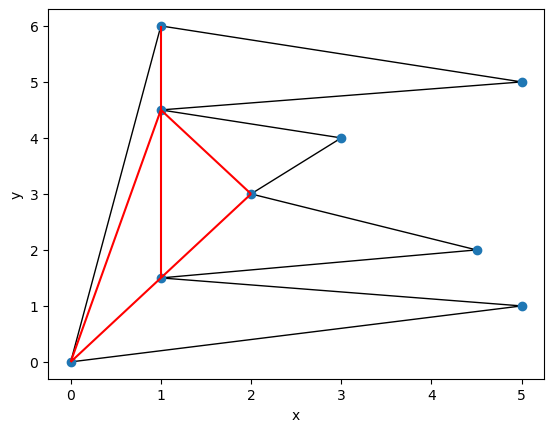

In [22]:
my_polygon = [(0, 0), (5, 1), (1, 1.5), (4.5, 2), (2, 3), (3, 4), (1, 4.5), (5, 5), (1, 6)]
my_tri, visa = triangulation(my_polygon, True)
draw_polygon_tri(my_polygon,my_tri)
visa.save_gif('my_triangulation.gif')

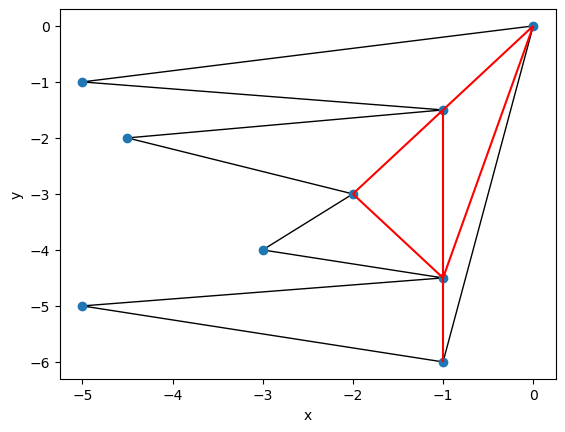

In [23]:
my_polygon2 = [(-x, -y) for x, y in my_polygon]
my_tri2, visa = triangulation(my_polygon2, True)
draw_polygon_tri(my_polygon2,my_tri2)
visa.save_gif('my_triangulation2.gif')

In [1]:
import matplotlib.pyplot as plt

TOLERANCE = 0.15

def dist(point1, point2):
    return np.sqrt(np.power(point1[0] - point2[0], 2) + np.power(point1[1] - point2[1], 2))

class InteractivePlot:
    def __init__(self, save_file):
        self.points = []
        self.lines = []
        self.save_file = save_file

        self.fig, self.ax = plt.subplots()
        self.ax.set_title('Interactive Plot')
        self.ax.set_xlabel('X-axis')
        self.ax.set_ylabel('Y-axis')

        self.fig.canvas.mpl_connect('button_press_event', self.on_click)

        self.save_button = plt.axes([0.8, 0.01, 0.1, 0.05])
        self.save_button = plt.Button(self.save_button, 'Save')
        self.save_button.on_clicked(self.save_points)

        self.import_button = plt.axes([0.6, 0.01, 0.1, 0.05])
        self.import_button = plt.Button(self.import_button, 'Import')
        self.import_button.on_clicked(self.import_points)

    def on_click(self, event):
        if event.inaxes is not None:
            x, y = event.xdata, event.ydata
            self.points.append((x, y))
            self.draw()

    def import_points(self, _):
        with open(self.save_file, 'r') as f:
            for line in f.readlines():
                x, y = line.split()
                self.points.append((float(x), float(y)))
        self.draw()

    def save_points(self, _):
        with open(self.save_file, 'w') as f:
            for point in self.points:
                f.write(f'{point[0]} {point[1]}\n')

    def draw(self):
        self.ax.clear()

        if self.points:
            x, y = zip(*self.points)
            self.ax.plot(x, y, 'ro')

            if len(self.points) > 1:
                for i in range(len(self.points) - 1):
                    line_x, line_y = zip(self.points[i], self.points[i + 1])
                    self.ax.plot(line_x, line_y, 'b-')

        # Plot properties
        self.ax.set_title('Interactive Plot')
        self.ax.set_xlabel('X-axis')
        self.ax.set_ylabel('Y-axis')
        self.save_button = plt.axes([0.8, 0.01, 0.1, 0.05])
        self.save_button = plt.Button(self.save_button, 'Save')
        self.save_button.on_clicked(self.save_points)
        self.import_button = plt.axes([0.6, 0.01, 0.1, 0.05])
        self.import_button = plt.Button(self.import_button, 'Import')
        self.import_button.on_clicked(self.import_points)

        self.fig.canvas.draw()

%matplotlib notebook

plot = InteractivePlot('points.txt')
plot.draw()


<IPython.core.display.Javascript object>